In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType']=label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG']=label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina']=label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=label_encoder.fit_transform(df['ST_Slope'])

In [4]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [7]:
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['RestingBP'] >= lower_bound) & (df['RestingBP'] <= upper_bound)]

Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]

Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['MaxHR'] >= lower_bound) & (df['MaxHR'] <= upper_bound)]

Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Oldpeak'] >= lower_bound) & (df['Oldpeak'] <= upper_bound)]

In [8]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,52.683526,0.761561,0.868497,131.420520,238.800578,0.161850,0.929191,140.635838,0.372832,0.829913,1.436416,0.462428
std,9.564897,0.426437,0.961663,15.381997,47.750050,0.368579,0.626859,24.487459,0.483908,0.960848,0.582179,0.498947
min,28.000000,0.000000,0.000000,92.000000,110.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,1.000000,0.000000,120.000000,206.000000,0.000000,1.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,234.500000,0.000000,1.000000,141.000000,0.000000,0.400000,1.000000,0.000000
75%,59.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,369.000000,1.000000,2.000000,202.000000,1.000000,3.600000,2.000000,1.000000


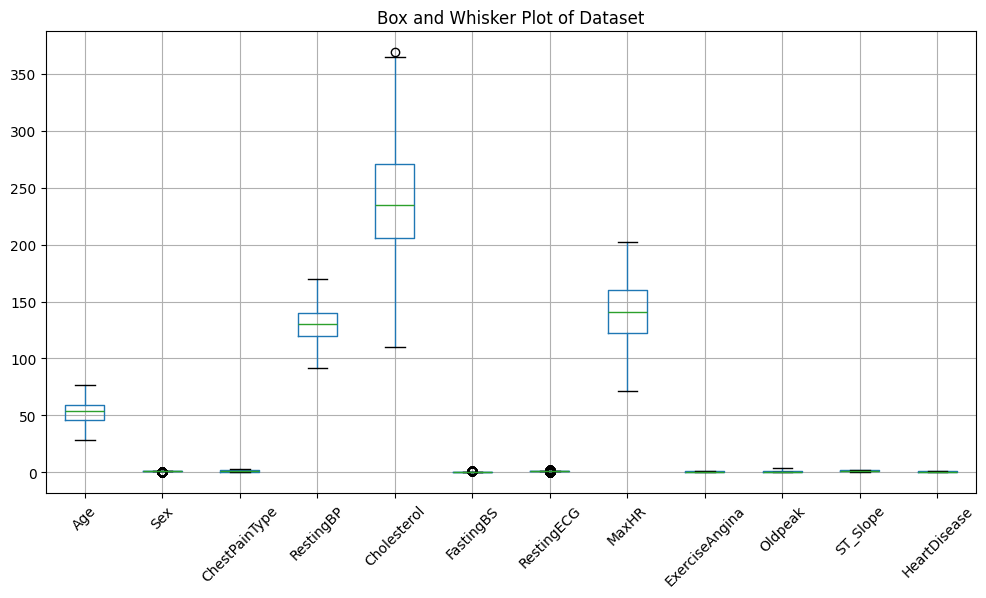

In [9]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box and Whisker Plot of Dataset')
plt.xticks(rotation=45)
plt.show()

In [10]:
X =df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [13]:
knn.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0])

In [14]:
accuracy_score(y_test,knn.predict(X_test))

0.6618705035971223

In [15]:
k_values = range(1, 50,2)

In [16]:
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)

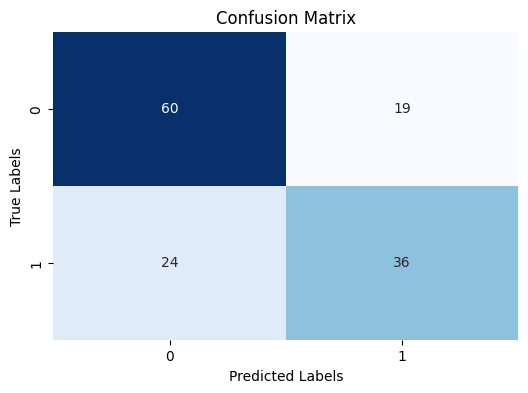

In [18]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

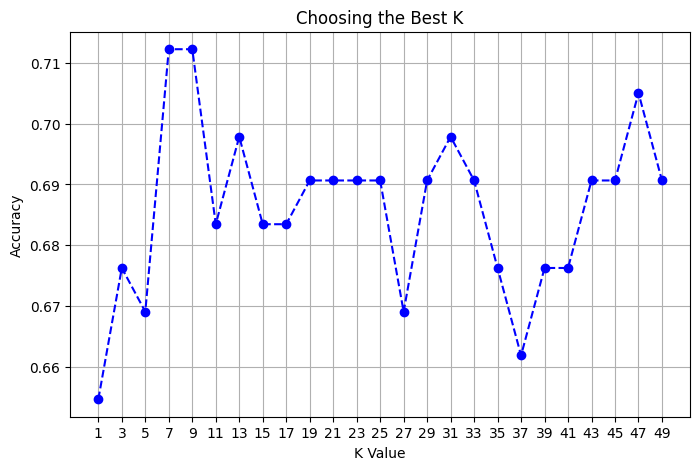

Best K: 7


<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K")
plt.xticks(k_values)
plt.grid(True)
plt.show()
plt.tight_layout()
# Find best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")